1. Find out the hot zone of terrorism
2. What all security issues and insights you can derive by EDA

In [1]:
# Importing the basic modules

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stat
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import kurtosis

%matplotlib inline 

In [2]:
# Importing the data

data =  pd.read_csv(r"C:\Users\nikhi\Downloads\SampleSuperstore.csv")

print('Loaded the Data')
data.head()

Loaded the Data


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Checking the data type of the variables of data 

data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

Here are some variables of the data which are in object form need to convert them into the data type they are supposed to be in

In [4]:
object_column_list = [col for col in data if data[col].dtypes == 'object']
print(object_column_list)

['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']


These are the columns which are object form and we've to convert them into dtype according to they supposed to be 

In [5]:
# Here instead of changing their data types individually we changed them using if condition 
# because all data that was in object data type supposed to be just in category data type


for col in data:
    if data[col].dtypes == 'object':
        data[col] = data[col].astype('category')

print("The variables of the data that are supposed to be in the category data type here we changed them")
data.dtypes

The variables of the data that are supposed to be in the category data type here we changed them


Ship Mode       category
Segment         category
Country         category
City            category
State           category
Postal Code        int64
Region          category
Category        category
Sub-Category    category
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [6]:
# Checking if there are any null/NaN values in variables of the data

for col in data:
    if data[col].isnull().sum() == 0:
        print(f'No null values in the {data[col].name}')
    else :
        print(f'There are null values in the {data[col].name}')


No null values in the Ship Mode
No null values in the Segment
No null values in the Country
No null values in the City
No null values in the State
No null values in the Postal Code
No null values in the Region
No null values in the Category
No null values in the Sub-Category
No null values in the Sales
No null values in the Quantity
No null values in the Discount
No null values in the Profit


There are no null/Nan values in the data

In [7]:
# Checking the basic information of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Ship Mode     9994 non-null   category
 1   Segment       9994 non-null   category
 2   Country       9994 non-null   category
 3   City          9994 non-null   category
 4   State         9994 non-null   category
 5   Postal Code   9994 non-null   int64   
 6   Region        9994 non-null   category
 7   Category      9994 non-null   category
 8   Sub-Category  9994 non-null   category
 9   Sales         9994 non-null   float64 
 10  Quantity      9994 non-null   int64   
 11  Discount      9994 non-null   float64 
 12  Profit        9994 non-null   float64 
dtypes: category(8), float64(3), int64(2)
memory usage: 501.5 KB


Here the info() tells us that data has no null values and also we have 8 category data type columns which later we need to encode them.

In [8]:
# Checking the all basic statistical information of the data

data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


So the describe function comes so much in handy when we need to check for the basic statistical summary<br>
Here the function tells us about the basic information of the data whose data types is either float or int (numeric data)<br>

__Correlation__: Measure of the linear relationship between two variables

The correlation of the numeric variables
             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000

The correlation plot of the variables(numeric) using heatmap 


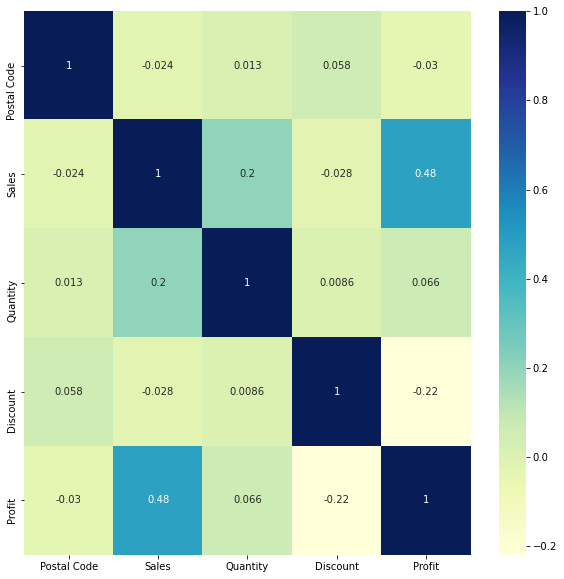

In [9]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print("The correlation of the numeric variables")
print(data.corr())
print()
  
print("The correlation plot of the variables(numeric) using heatmap ")
plt.figure(figsize=(10, 10))
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

Here we can see that the columns has positive and the negative correlation with eachother and also we get better understanding about which variables and how they are proportional to each other<br>

Here we can see that the variables __Profit__ and __Sales__ has positive correlation in between 

In [10]:
# Checking all the numeric columns of the data

numeric_data = [col for col in data if data[col].dtypes == 'int64' or data[col].dtypes == 'float64']

print("The numeric variables of the data only")
print(numeric_data)

The numeric variables of the data only
['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']


Checking for the outliers in the data only for the numeric data using the numeric_list created using the list comprehension method

Using the boxplot checking for the outliers and the spread of the numeric variables of the data 


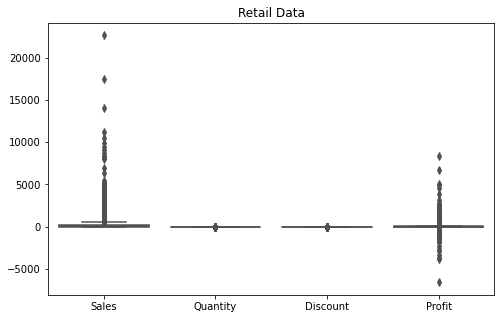

In [11]:
print("Using the boxplot checking for the outliers and the spread of the numeric variables of the data ")
plt.figure(figsize=(8,5))
sns.boxplot(data=data[['Sales', 'Quantity', 'Discount', 'Profit']], palette='rainbow')
plt.title("Retail Data")
plt.show()

Here we can see that the Sales and Profit columns of the data has so many outliers

We're scalinng the data down as our data so many outliers and the is also widely spreaded 

In [12]:
# instantiating the min max module in the scaler variable
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data[['Sales', 'Quantity', 'Discount', 'Profit']])

scaled_data = pd.DataFrame(scaled, columns=['Sales', 'Quantity', 'Discount', 'Profit'])

In [13]:
print('Scaled Data')
scaled_data.head()

Scaled Data


,Sales,Quantity,Discount,Profit
0,0.011552,0.076923,0.0000,0.442794
1,0.032313,0.153846,0.0000,0.454639
2,0.000626,0.076923,0.0000,0.440458
3,0.042280,0.307692,0.5625,0.414464
4,0.000968,0.076923,0.2500,0.440168


In [14]:
# Checking the basic statistical data information of the scaled data
scaled_data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,0.010134,0.214583,0.195253,0.441910
std,0.027531,0.171162,0.258065,0.015617
min,0.000000,0.000000,0.000000,0.000000
25%,0.000744,0.076923,0.000000,0.440115
50%,0.002387,0.153846,0.250000,0.440578
75%,0.009254,0.307692,0.250000,0.441957
max,1.000000,1.000000,1.000000,1.000000


Checking for the outliers in the scaled data using the boxplot 


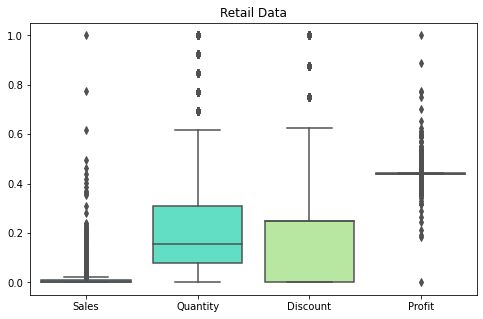

In [15]:
print("Checking for the outliers in the scaled data using the boxplot ")
plt.figure(figsize=(8,5))
sns.boxplot(data=scaled_data, palette='rainbow')
plt.title("Retail Data")
plt.show()

__Lets's dig down a little with sales and profit__


In [16]:
# Sales

print("Mean of the Sales           :", round(scaled_data['Sales'].mean(), 4))
print("Standard Deviation of Sales :", round(scaled_data['Sales'].std(), 4))
print("Variance the Sales          :", round(stat.variance(scaled_data['Sales']), 4))
print()

print("Also the the difference between the Standard Deviation and Mean of the sales tells us that the data is widely spreaded ")

Mean of the Sales           : 0.0101
Standard Deviation of Sales : 0.0275
Variance the Sales          : 0.0008

Also the the difference between the Standard Deviation and Mean of the sales tells us that the data is widely spreaded 


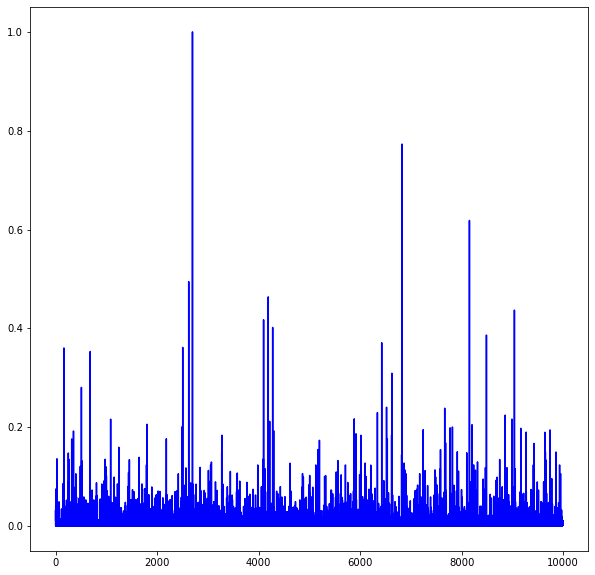

The sales data is really widely spreaded also there are 14 outliers which shows that the retail had the big sales


In [17]:
# Checking the data of the sales variables , how widely it's spreaded

plt.figure(figsize=(10, 10))
plt.plot(scaled_data['Sales'], color='blue')
plt.show()
print("The sales data is really widely spreaded also there are 14 outliers which shows that the retail had the big sales")

In [18]:
# Profit

print("Mean of the Profit           :", round(scaled_data['Profit'].mean(), 4))
print("Standard Deviation of Profit :", round(scaled_data['Profit'].std(), 4))
print("Variance the Profit          :", round(stat.variance(scaled_data['Profit']), 4))
print()

print("Also the the difference between the Standard Deviation and Mean of the sales tells us how data is really widely spreaded ")

Mean of the Profit           : 0.4419
Standard Deviation of Profit : 0.0156
Variance the Profit          : 0.0002

Also the the difference between the Standard Deviation and Mean of the sales tells us how data is really widely spreaded 


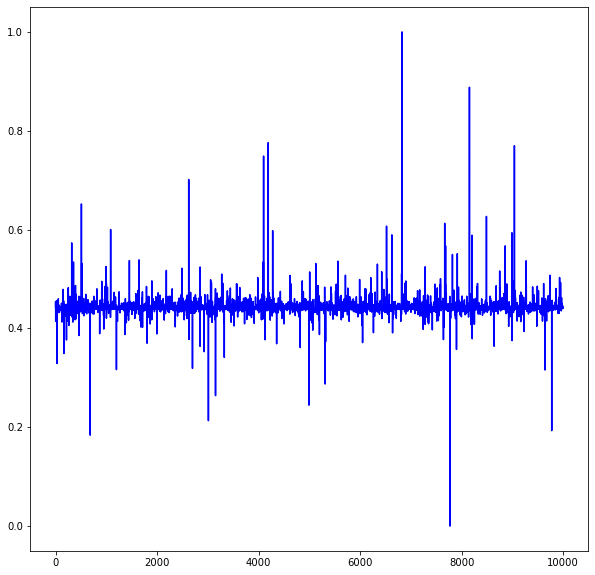

The profit data is really widely spreaded and also there are almost 14 outliers which 8 of them shows that the retail had great profit         and the rest shows retail had the big lost


In [19]:
# Checking the data of the sales variables , how widely it's spreaded

plt.figure(figsize=(10, 10))
plt.plot(scaled_data['Profit'], color='blue')
plt.show()
print("The profit data is really widely spreaded and also there are almost 14 outliers which 8 of them shows that the retail had great profit \
        and the rest shows retail had the big lost")

Here we can see that there are so many outliers in the __Sales__ and __Profit__<br>
And also the spread of the __Sales__ and __Profit__ is wide to solve this we need to drop some of them outliers  

In [20]:
# Preparing a new variable to perform manipulations with only numeric data

numeric_data1 = data[['Sales', 'Quantity', 'Discount', 'Profit']]

### Sales

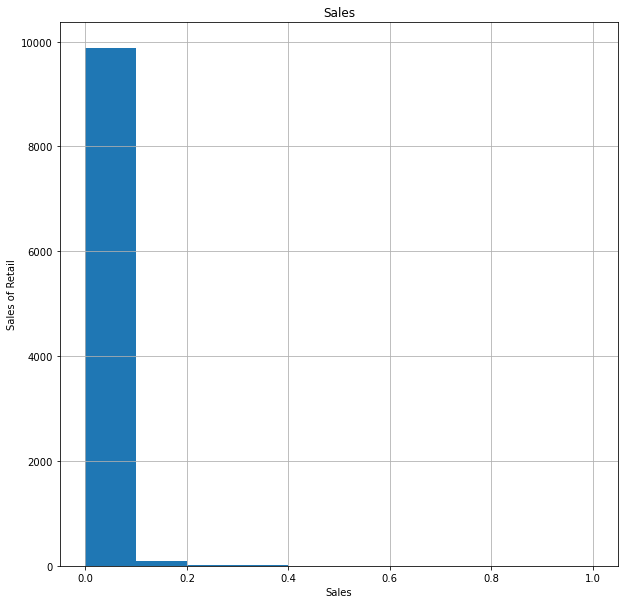

This shows that the max sales occurs in between 0.0(0) to 0.2(5000)


In [21]:
# Checking the spread of the sales data
plt.figure(figsize=(10, 10))
figure= scaled_data['Sales'].hist()
figure.set_title('Sales')
figure.set_xlabel('Sales')
figure.set_ylabel('Sales of Retail')
plt.show()

print('This shows that the max sales occurs in between 0.0(0) to 0.2(5000)')

This shows that Sales is postively skewed

In [22]:
sale_skew = data['Sales'].skew()

print(round(sale_skew, 2))
print('This shows that the data has positive skewness')

12.97
This shows that the data has positive skewness


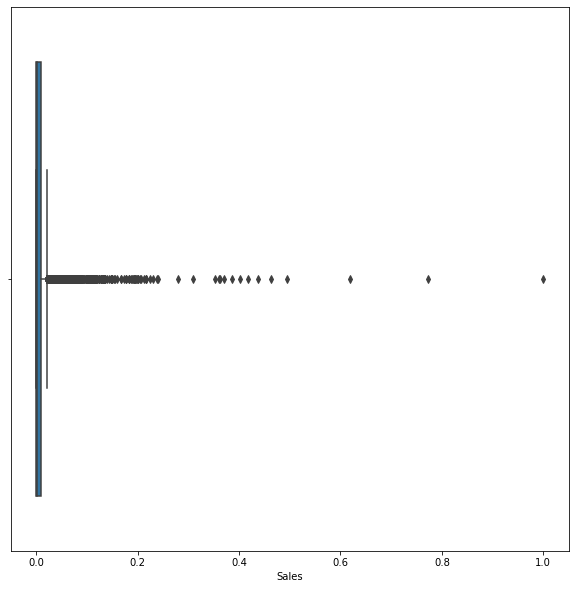

We can see here that sales variables has so many outliers


In [23]:
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Sales', data=scaled_data)
plt.show()
print("We can see here that sales variables has so many outliers")

This shows sales has so many outliers which is just a positive sign that retail has outstanding sales

In [24]:
sale_data = scaled_data['Sales']


mean = np.mean(sale_data) 
std = np.std(sale_data) 
print('Mean of the kid''s age in the given series :', round(mean, 2)) 
print('STD Deviation of profit in the given series :', round(std, 2))
threshold = 3
outlier = [] 
for i in sale_data: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 

outlier = pd.DataFrame(outlier, columns=['Outlier'])

print('Outlier in the dataset is (Sale):')
print(f"There are {outlier.shape[0]} outliers in the sale column")

Mean of the kids age in the given series : 0.01
STD Deviation of profit in the given series : 0.03
Outlier in the dataset is (Sale):
There are 127 outliers in the sale column


In [25]:
data_sort_sales = data.sort_values(by='Sales')

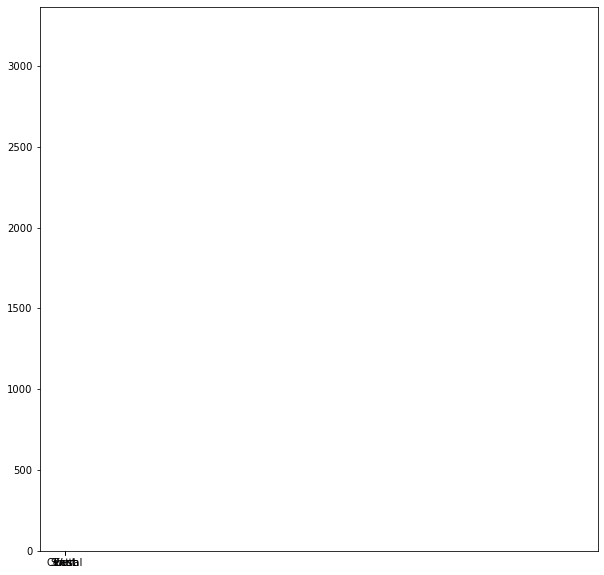

This shows that the East region has the highest sales


In [26]:
x = data_sort_sales['Region']
y = data_sort_sales['Sales']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

print("This shows that the East region has the highest sales")

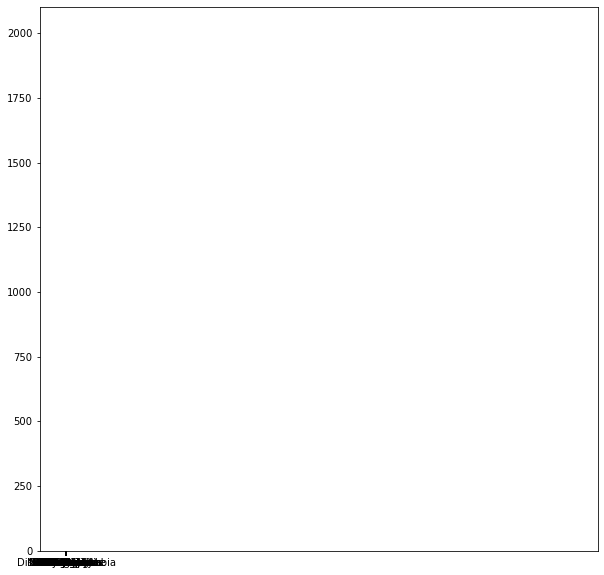

This shows that the state 'Illinosis has the highest sales among the all states


In [27]:
x = data_sort_sales['State']
y = data_sort_sales['Sales']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

print("This shows that the state 'Illinosis has the highest sales among the all states")

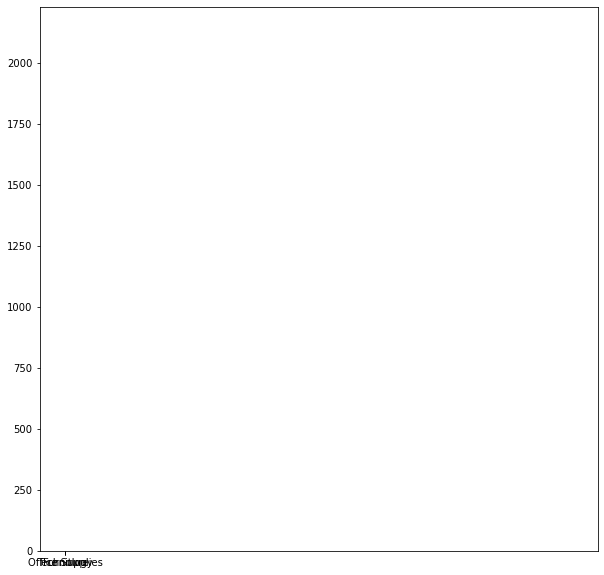

This shows that the Technology is most sale in category


In [28]:
x = data_sort_sales['Category']
y = data_sort_sales['Sales']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

print("This shows that the Technology is most sale in category")

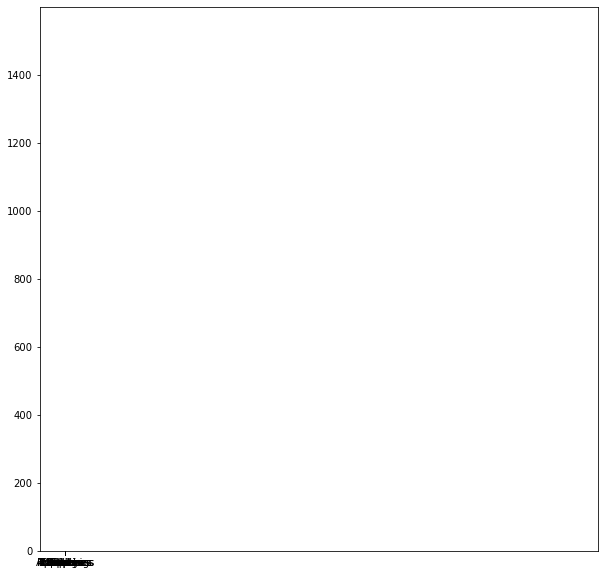

This shows that the Binders are most sale Sub-Category


In [29]:
x = data_sort_sales['Sub-Category']
y = data_sort_sales['Sales']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

print("This shows that the Binders are most sale Sub-Category")

Using the distplot too get the idea of kurtosis of sales


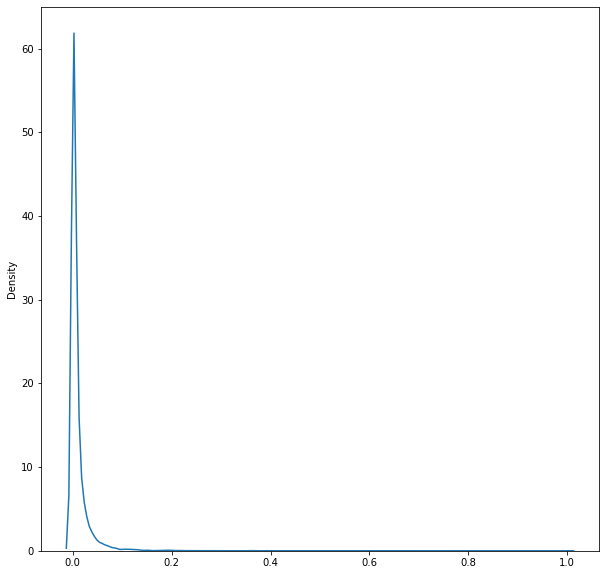

In [30]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("Using the distplot too get the idea of kurtosis of sales")
plt.figure(figsize=(10,10))
sns.distplot(scaled_data[['Sales']], label='Sales', hist=False)
plt.show()

In [31]:
kurtosis_ = kurtosis(data['Sales'], fisher=False)

if kurtosis_ > 3 :
    print('The Sales is Leptokurtic')
elif kurtosis_ < 3 :
    print('The Sales is Platykurtic')
else :
    print('The Sales is Mesokurtic')

The Sales is Leptokurtic


### Quantity

Checking the skewness of the Quantity of variable


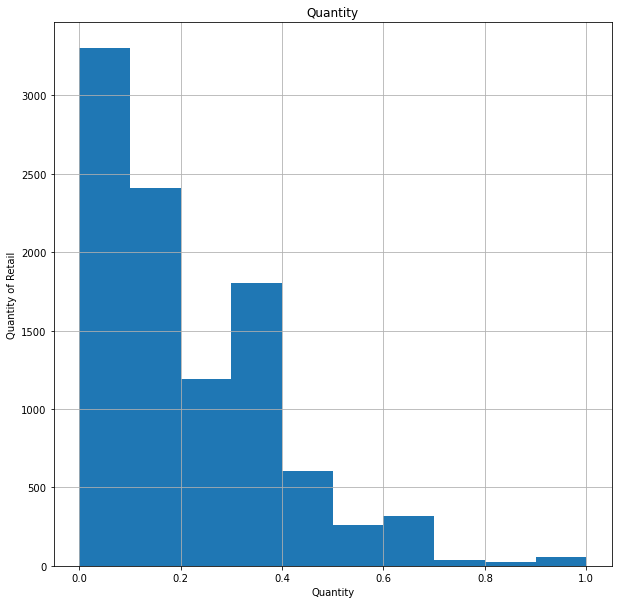

In [32]:
print("Checking the skewness of the Quantity of variable")
plt.figure(figsize=(10, 10))
figure=scaled_data['Quantity'].hist(bins=10)
figure.set_title('Quantity')
figure.set_xlabel('Quantity')
figure.set_ylabel('Quantity of Retail')
plt.show()

This shows that Quantity is postively skewed

In [33]:
quant_skew = scaled_data['Quantity'].skew()

print(f"The Quantity variable is positively skewed {round(quant_skew, 2)}")

The Quantity variable is positively skewed 1.28


Using the boxplot to check the outliers or the spread of the Quantity variable.


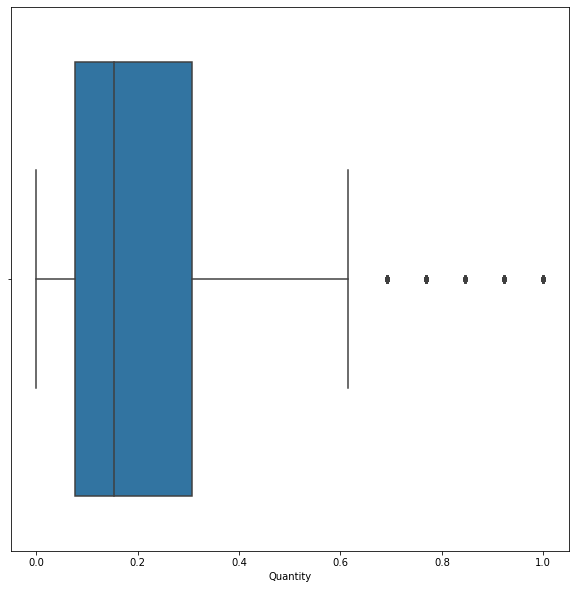

Here we can see that the Quantity has just 5 outliers


In [34]:
print("Using the boxplot to check the outliers or the spread of the Quantity variable.")
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Quantity', data=scaled_data)
plt.show()
print('Here we can see that the Quantity has just 5 outliers')

Checking the spread of the Quantity variable


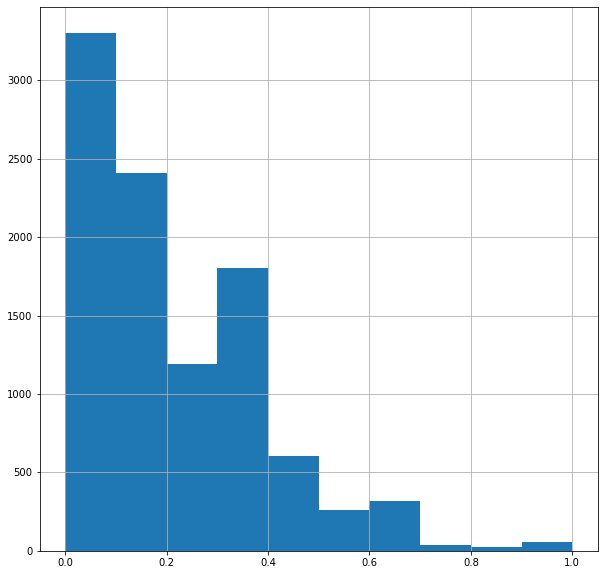

The Quantity data is right skewed which shows that the data is positively skewed.


In [35]:
print("Checking the spread of the Quantity variable")
# Histogram of Quantity
plt.figure(figsize=(10, 10))
scaled_data['Quantity'].hist()
plt.show()

print("The Quantity data is right skewed which shows that the data is positively skewed.")

In [39]:
quantity_data = scaled_data['Quantity']


mean = np.mean(quantity_data) 
std = np.std(quantity_data) 
print('Mean of the kid''s age in the given series :', round(mean)) 
print('STD Deviation of profit in the given series :', std)
threshold = 3
outlier = [] 
for i in quantity_data: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 

outlier = pd.DataFrame(outlier, columns=['Outlier'])

print(f'Outlier in the dataset is (Profit): {outlier[:5]}')
print(f"There are {outlier.shape[0]} outliers in the quantity column")

Mean of the kids age in the given series : 0
STD Deviation of profit in the given series : 0.17115372046758145
Outlier in the dataset is (Profit):     Outlier
0  1.000000
1  1.000000
2  0.769231
3  0.923077
4  0.923077
There are 113 outliers in the quantity column


In [40]:
data_sort_quantity = data.sort_values('Quantity')

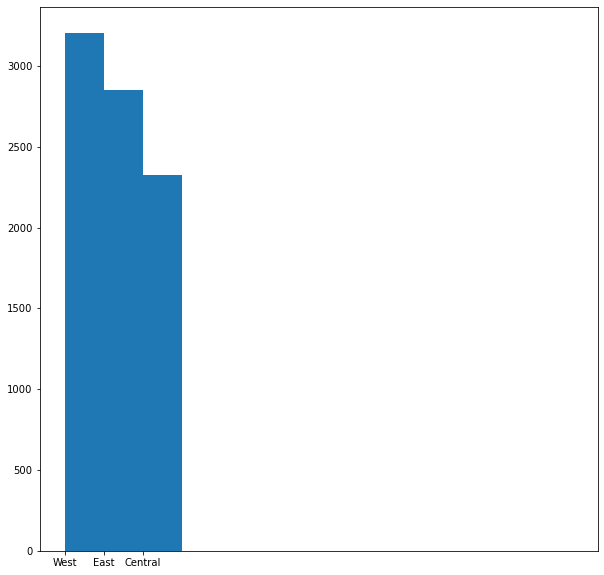

In [41]:
x = data_sort_quantity['Region']
y = data_sort_quantity['Quantity']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

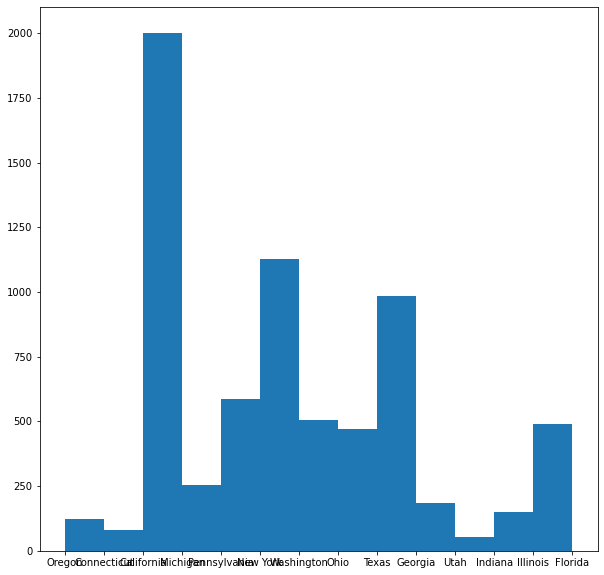

In [42]:
x = data_sort_quantity['State']
y = data_sort_quantity['Quantity']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

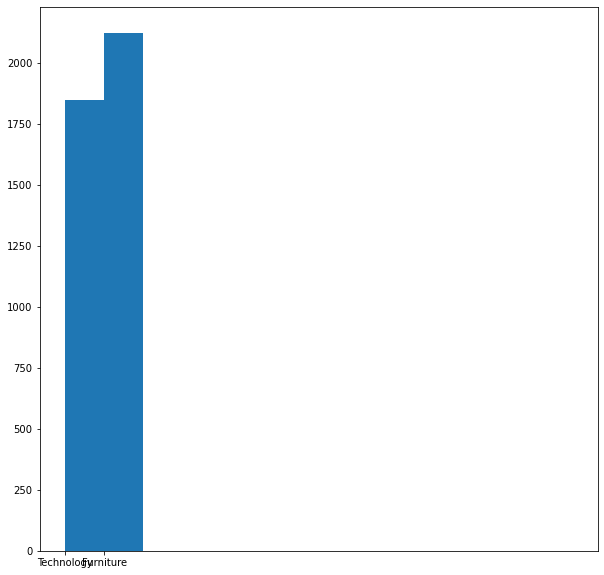

In [43]:
x = data_sort_quantity['Category']
y = data_sort_quantity['Quantity']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

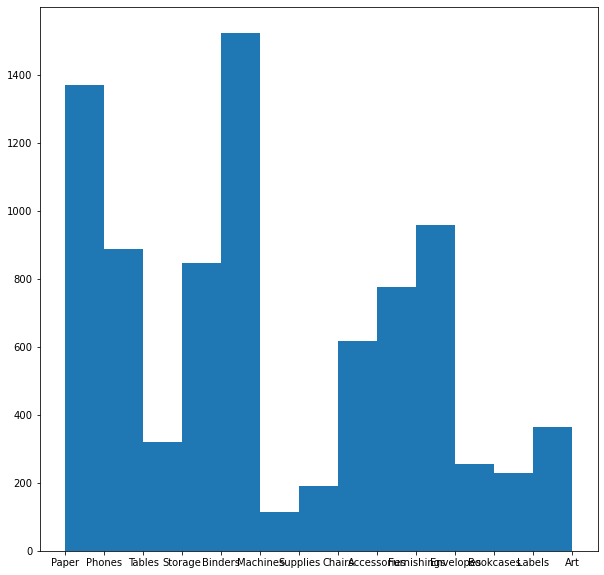

In [44]:
x = data_sort_quantity['Sub-Category']
y = data_sort_quantity['Quantity']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

In [45]:
kurtosis_ = kurtosis(data['Quantity'], fisher=False)

if kurtosis_ > 3 :
    print('The Quantity data is Leptokurtic')
elif kurtosis_ < 3 :
    print('The Quantity data is Platykurtic')
else :
    print('The Quantity data is Mesokurtic')

The Quantity data is Leptokurtic


### Discount

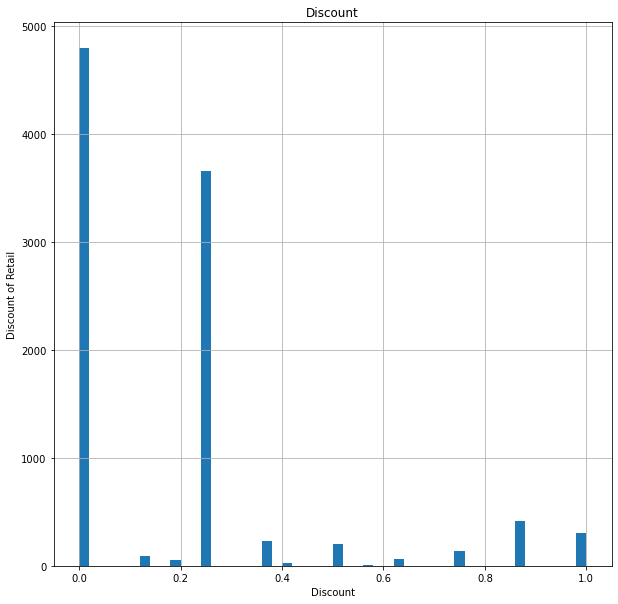

In [46]:
plt.figure(figsize=(10, 10))
figure=scaled_data['Discount'].hist(bins=50)
figure.set_title('Discount')
figure.set_xlabel('Discount')
figure.set_ylabel('Discount of Retail')
plt.show()

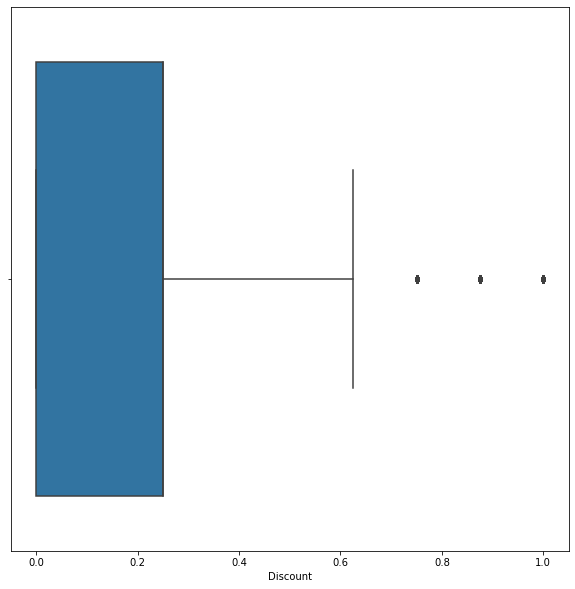

In [47]:
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Discount', data=scaled_data)
plt.show()

Here we can see that Discount has 3 outliers which means the retail has gave the customers 3 big discounts.

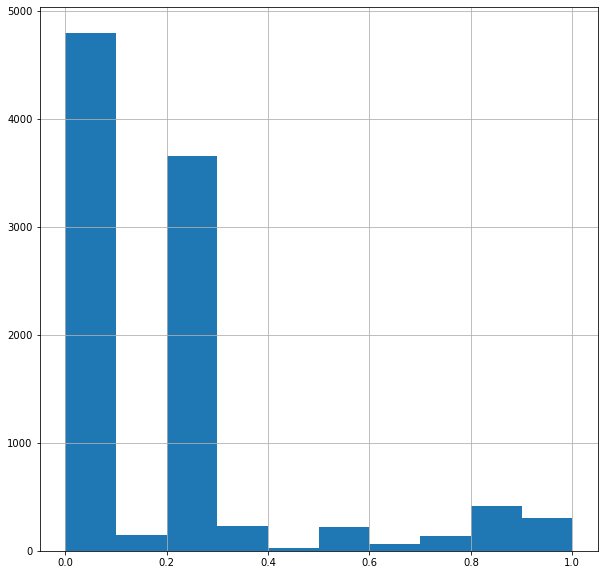

In [48]:
# Histogram of Discount
plt.figure(figsize=(10, 10))
scaled_data['Discount'].hist()
plt.show()

This shows that the discount data is also positively skewed data

In [49]:
discount_data = scaled_data['Discount']


mean = np.mean(discount_data) 
std = np.std(discount_data) 
print('Mean of the kid''s age in the given series :', mean) 
print('STD Deviation of profit in the given series :', std)
threshold = 3
outlier = [] 
for i in discount_data: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 

outlier = pd.DataFrame(outlier, columns=['Outlier'])

print('Outlier in the dataset is (Profit):')
print(f"There are {outlier.shape[0]} outliers in the discount column")

Mean of the kids age in the given series : 0.1952534020412248
STD Deviation of profit in the given series : 0.2580520484645771
Outlier in the dataset is (Profit):
There are 300 outliers in the discount column


In [50]:
data_sort_discount = data.sort_values(by='Discount')

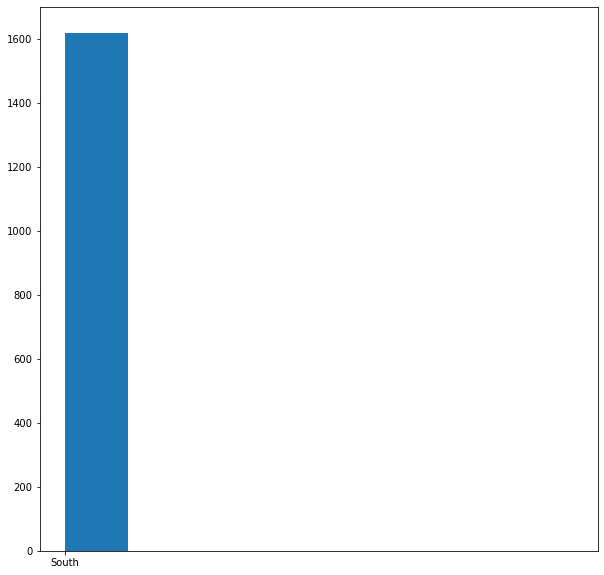

In [51]:
x = data_sort_discount['Region']
y = data_sort_discount['Discount']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

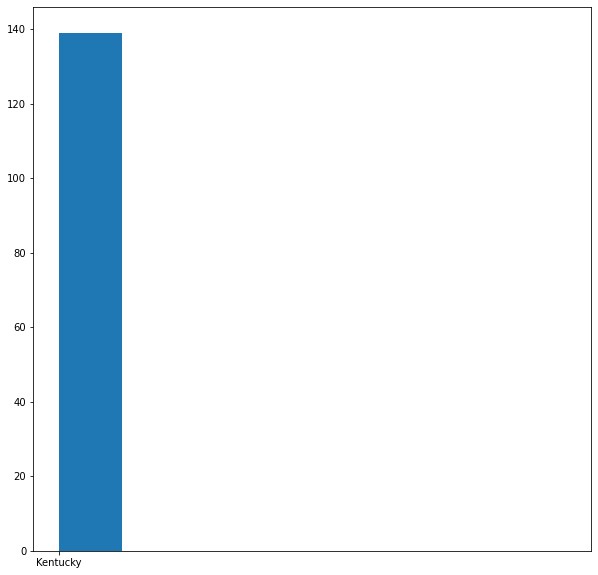

In [52]:
x = data_sort_discount['State']
y = data_sort_discount['Discount']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

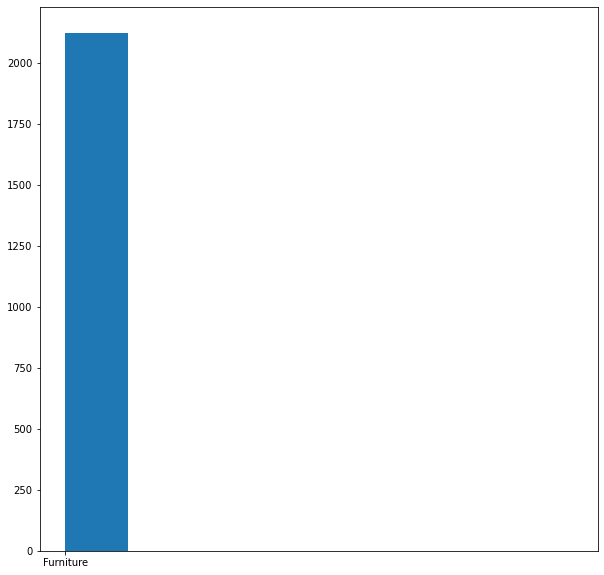

In [53]:
x = data_sort_discount['Category']
y = data_sort_discount['Discount']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

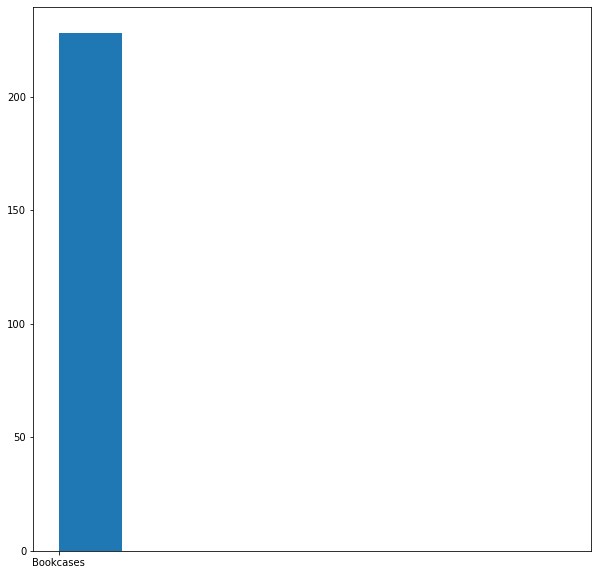

In [54]:
x = data_sort_discount['Sub-Category']
y = data_sort_discount['Discount']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

In [55]:
kurtosis_ = kurtosis(data['Discount'], fisher=False)

if kurtosis_ > 3 :
    print('The Discount data is Leptokurtic')
elif kurtosis_ < 3 :
    print('The Discount data is Platykurtic')
else :
    print('The Discount data is Mesokurtic')

The Discount data is Leptokurtic


### Profit

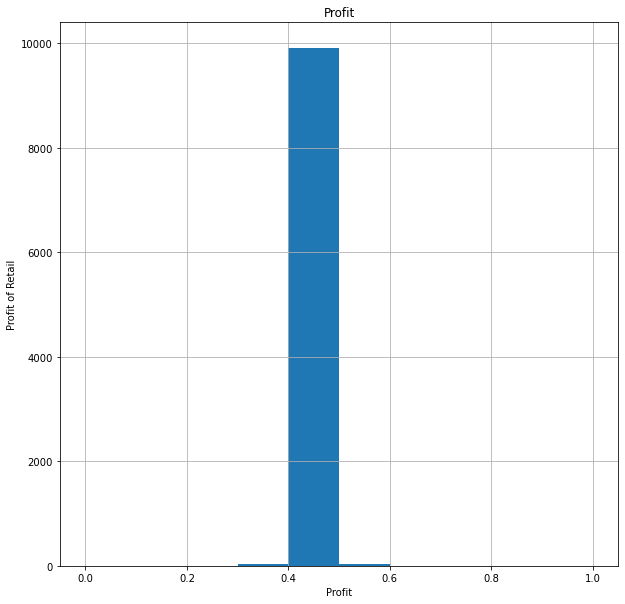

In [56]:
plt.figure(figsize=(10, 10))
figure=scaled_data['Profit'].hist(bins=10)
figure.set_title('Profit')
figure.set_xlabel('Profit')
figure.set_ylabel('Profit of Retail')
plt.show()

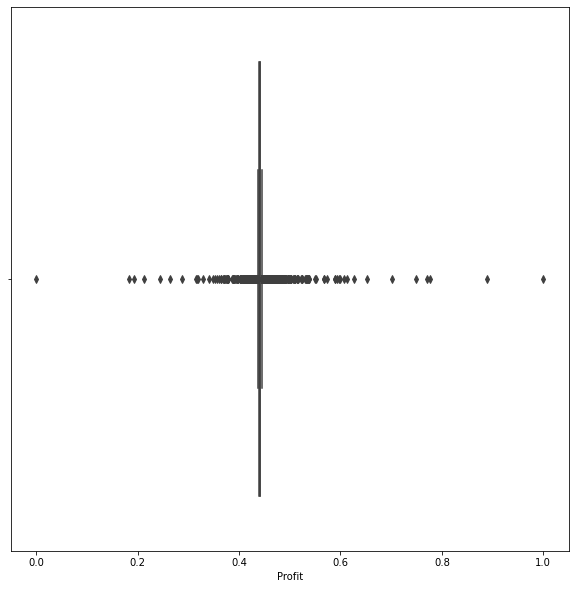

In [57]:
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Profit', data=scaled_data)
plt.show()

Here as well the Profit also has so many outliers which says the retail sometime had so much profit but as well the loss also 

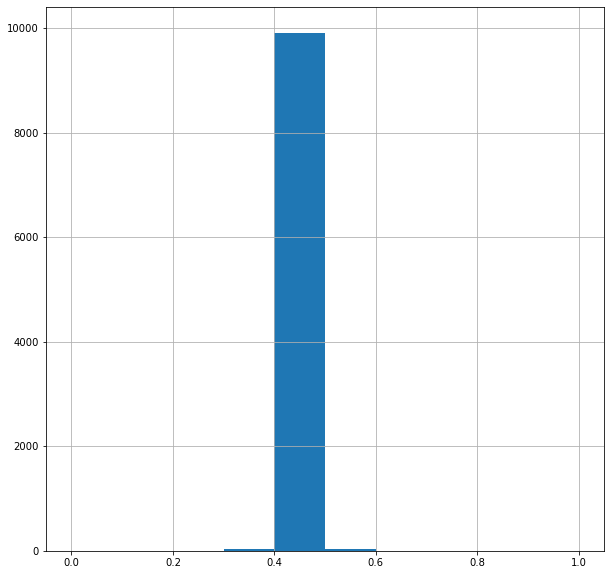

In [58]:
# Histogram of Profit
plt.figure(figsize=(10, 10))
scaled_data['Profit'].hist()
plt.show()

In [59]:
scaled_data['Profit'].unique()

array([0.44279413, 0.45463873, 0.44045798, ..., 0.44107482, 0.4402734 ,
       0.4448631 ])

In [60]:
profit_data = scaled_data['Profit']


mean = np.mean(profit_data) 
std = np.std(profit_data) 
print('Mean of the kid''s age in the given series :', mean) 
print('STD Deviation of profit in the given series :', std)
threshold = 3
outlier = [] 
for i in profit_data: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 

outlier = pd.DataFrame(outlier, columns=['Outlier'])

print('Outlier in the dataset is (Profit):')
print(f"There are {outlier.shape[0]} outliers in the profit column")

Mean of the kids age in the given series : 0.44191034827891856
STD Deviation of profit in the given series : 0.015616607048285481
Outlier in the dataset is (Profit):
There are 70 outliers in the profit column


In [61]:
data_sort_profit = data.sort_values(by='Profit')

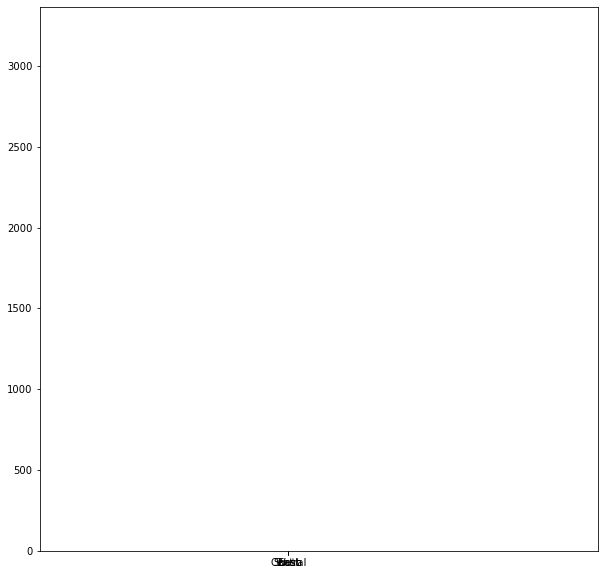

In [62]:
x = data_sort_profit['Region']
y = data_sort_profit['Profit']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

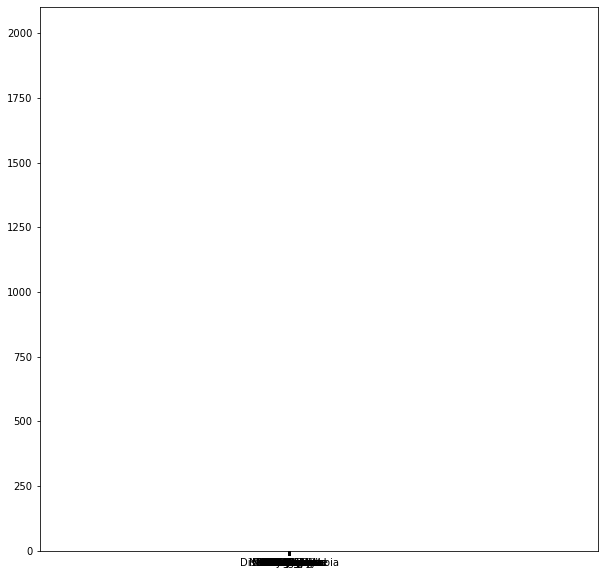

In [63]:
x = data_sort_profit['State']
y = data_sort_profit['Profit']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

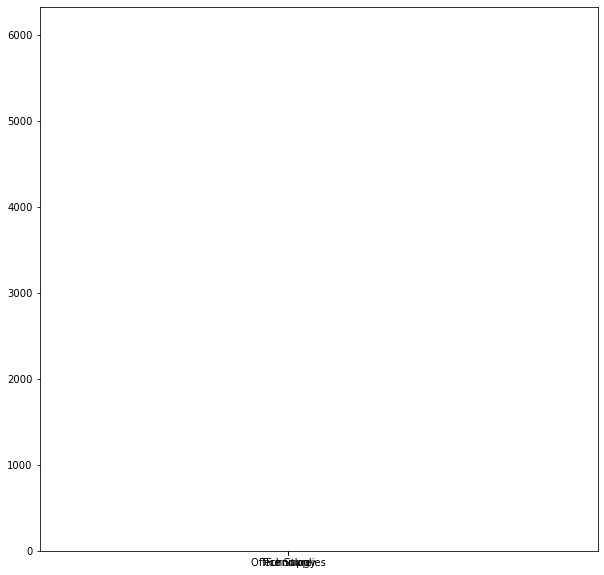

In [64]:
x = data_sort_profit['Category']
y = data_sort_profit['Profit']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

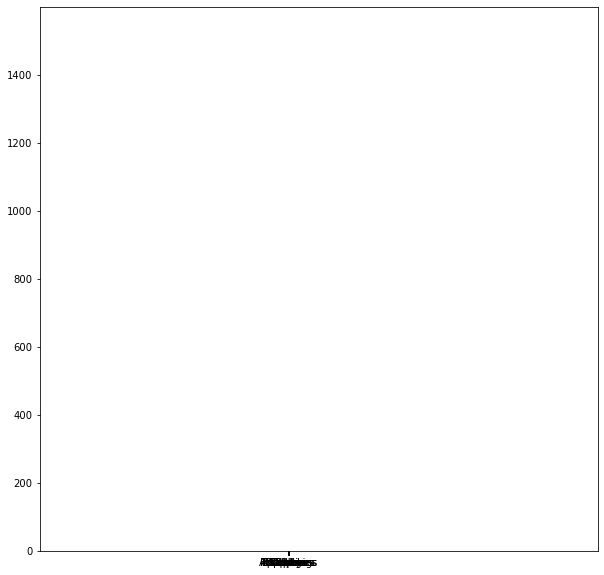

In [65]:
x = data_sort_profit['Sub-Category']
y = data_sort_profit['Profit']

plt.figure(figsize=(10, 10))
plt.hist(x, y)
plt.show()

In [66]:
kurtosis_ = kurtosis(data['Profit'], fisher=False)

if kurtosis_ > 3 :
    print('The Profit data is Leptokurtic')
elif kurtosis_ < 3 :
    print('The Profit data is Platykurtic')
else :
    print('The Profit data is Mesokurtic')

The Profit data is Leptokurtic


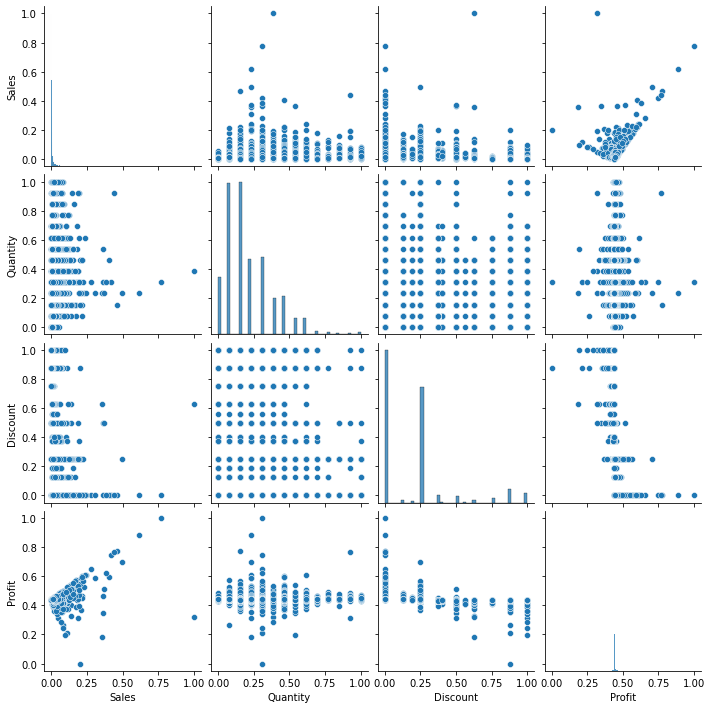

In [67]:
sns.pairplot(scaled_data)
plt.show()

In [68]:
scaled_data.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

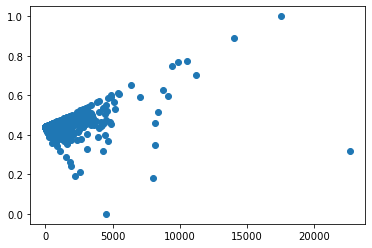

In [69]:
plt.scatter(data['Sales'], scaled_data['Profit'])
plt.show()

This showing that the profit and sales has a positive linear relationship in between 

In [70]:
# Checking the list of the category data using the list comprehension method

categorical_data = [col for col in data if data[col].dtypes.name == 'category']

categorical_data

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

In [71]:
scaled_data.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [72]:
data[['Sales', 'Quantity', 'Discount', 'Profit']] = scaled_data[['Sales', 'Quantity', 'Discount', 'Profit']] 

In [73]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,0.011552,0.076923,0.0000,0.442794
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,0.032313,0.153846,0.0000,0.454639
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,0.000626,0.076923,0.0000,0.440458
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,0.042280,0.307692,0.5625,0.414464
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,0.000968,0.076923,0.2500,0.440168


In [74]:
# Sorting by column 'Sales'
data_sort_sales = data.sort_values(by=['Sales'])

In [75]:
numeric_data

['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

In [76]:
numeric_data_ = data[['Sales', 'Quantity', 'Discount', 'Profit']]

In [77]:
from sklearn import preprocessing

normalized_arr = preprocessing.normalize(numeric_data_)
print(normalized_arr)

[[0.02569554 0.17110195 0.         0.9849182 ]
 [0.06717118 0.31981322 0.         0.94509658]
 [0.00140051 0.1720393  0.         0.98508909]
 ...
 [0.02222229 0.14991406 0.48722069 0.86002787]
 [0.0025881  0.46373413 0.         0.88597063]
 [0.02374179 0.17033757 0.         0.98509971]]


In [78]:
normalized_data = pd.DataFrame(normalized_arr, columns=['Sales', 'Quantity', 'Discount', 'Profit'])

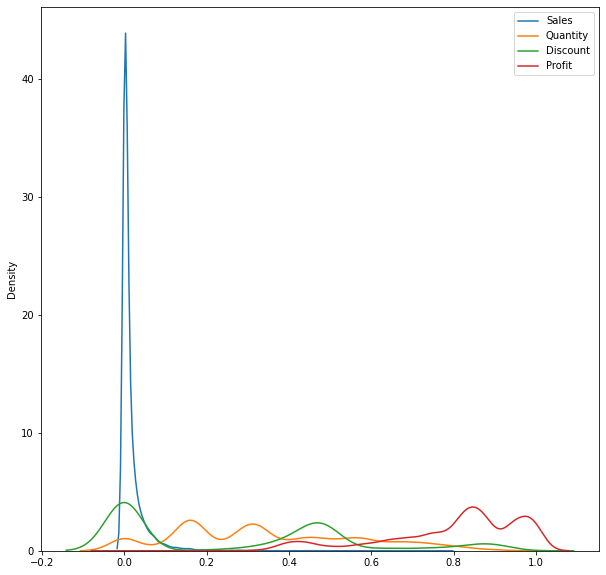

In [79]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10,10))
sns.distplot(normalized_data[['Sales']], label='Sales', hist=False)
sns.distplot(normalized_data[['Quantity']], label='Quantity', hist=False)
sns.distplot(normalized_data[['Discount']], label='Discount', hist=False)
sns.distplot(normalized_data[['Profit']], label='Profit', hist=False)
plt.legend()
plt.show()